이산형 확률분포

In [1]:
# 1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X = [x_set,f]

In [2]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<BarContainer object of 6 artists>

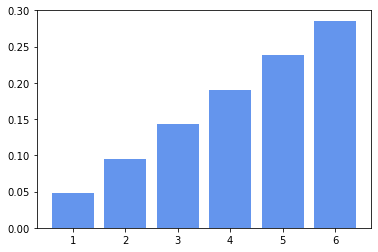

In [8]:
plt.bar(x_set, prob,color='cornflowerblue')

Text(0.5, 1.0, 'Bar Graph')

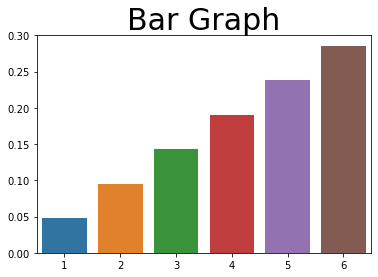

In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('Bar Graph',fontsize=30)

In [11]:
np.all(prob>=0)

True

In [12]:
np.sum(prob)

0.9999999999999999

In [13]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k<=x])

In [15]:
F(6)

0.9999999999999999

In [16]:
# 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
y_set = np.array([2 * x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [18]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다.
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [19]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334324

In [20]:
# 일반화 E(확률변수의 기댓값)
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [21]:
E(X)

4.333333333333333

In [22]:
E(X, g=lambda x:2*x+3)

11.666666666666664

In [23]:
# 기댓값의 선형성
2 * E(X) + 3

11.666666666666666

In [24]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [25]:
# g를 사용한 일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 *f(i) for i in x_set])

In [26]:
V(X)

2.2222222222222223

In [27]:
V(X, lambda x:2*x+3)

8.88888888888889

In [28]:
# 분산의 공식
2**2*V(X)

8.88888888888889

In [29]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [30]:
def f_XY(x,y):
    if 1 <= y <=6 and 1 <= x-y <=6:
        return y*(x-y)/441
    else:
        return 0

In [31]:
XY = [x_set,y_set,f_XY]

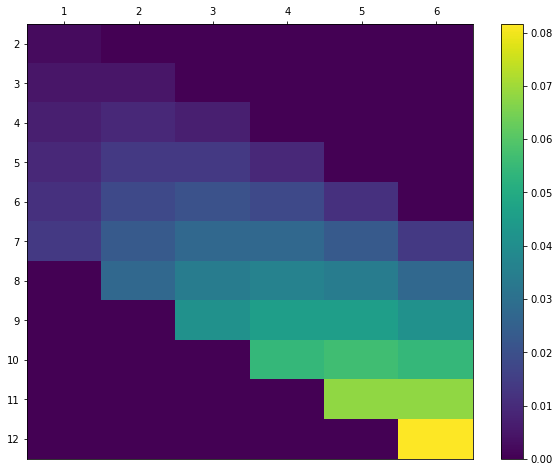

In [35]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set]
                for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5, minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다.
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [36]:
np.all(prob>=0)

True

In [37]:
np.sum(prob)

1.0

In [38]:
# 주변확률분포 : 확률변수(X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [39]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [40]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [41]:
X = [x_set,f_X]
Y = [y_set,f_Y]

In [42]:
X

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [43]:
Y

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

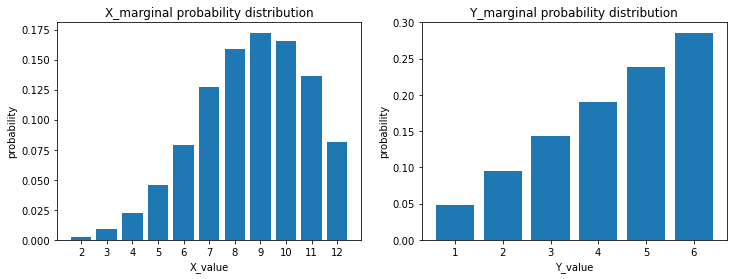

In [44]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [45]:
# 2차원 이산형 확률분포의 지표
# 기댓값 (확률변수의 평균)
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])   # 이중 for문

8.666666666666666

In [52]:
# 다중 for문
sum = 0
for y_j in y_set:
    for x_i in x_set:
        sum += x_i * f_XY(x_i, y_j)
sum

8.666666666666666

In [46]:
def E(XY,g):
    x_set,y_set,f_XY=XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [54]:
mean_X = E(XY,lambda x,y:x)
mean_X

8.666666666666666

In [55]:
mean_Y = E(XY, lambda x,y:y)
mean_Y

4.333333333333333

In [56]:
a,b=2,3

In [57]:
# 기댓값의 선형성
E(XY,lambda x,y:a*x+b*y)

30.333333333333332

In [58]:
# 분산 : X의 분산이라면 X에 관한 편차의 제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [65]:
# 분산의 함수
def V(XY,g):
    x_set,y_set,f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [66]:
var_X = V(XY,g=lambda x,y:x)
var_X

4.444444444444444

In [67]:
var_Y = V(XY,g=lambda x,y:y)
var_Y

2.2222222222222223

In [68]:
def Cov(XY):
    x_set,y_set,f_XY=XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [69]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [70]:
V(XY,lambda x,y:a*x + b*y)

64.44444444444444

In [71]:
# 분산과 공분산의 공식
a**2*var_X + b**2*var_Y + 2*a*b * cov_xy

64.44444444444443

In [72]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X*var_Y)

0.7071067811865474

대표적인 이산형 확률분포

In [77]:
# assert : 원하는 조건의 변수 값을 보증받을 때까지 테스트
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X, g=lambda x:x):
    x_set, f=X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
def V(X,g=lambda x:x):
    x_set, f=X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0),'minus probablity'
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probablity{prob_sum}'
    print(f'expected value {E(X):4}')
    print(f'variance{(V(X)):4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob')
    ax.vlines(E(X),0,1,label='mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    
    plt.show()

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

In [78]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set,f

In [79]:
p = 0.3
X = Bern(p)

In [80]:
check_prob(X)

expected value  0.3
variance0.20999999999999996


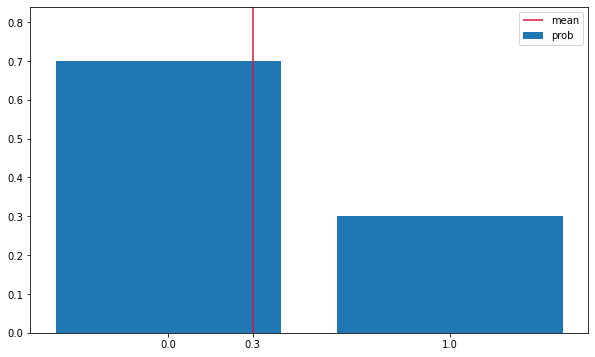

In [81]:
plot_prob(X)

In [82]:
rv = stats.bernoulli(p)

In [83]:
rv.pmf(0),rv.pmf(1)

(0.7, 0.3)

In [84]:
rv.pmf([0,1])

array([0.7, 0.3])

In [85]:
rv.cdf([0,1])

array([0.7, 1. ])

In [86]:
rv.mean(),rv.var()

(0.3, 0.21)

#### 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,...n\}$)

        0             (otherwise)

In [88]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [92]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요,

In [ ]:
# [과제] 상기이항분포의 확률함수와 기댓값을 시각화하세요.

In [ ]:
# [과제] 확률이 0.3, 0.5, 0.7 로 변할 때 확률함수가 변하는 모습을 시각화 하세요.

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터가 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,...\})$

          0                      (otherwise)
- 기하분포의 기댓값과 분산 : E(X) = 1/p, v(X) = (1-p)/$p^2$

In [ ]:
# [과제] 사용자 함수를 구하세요. (단, 확률변수를 1 이상 29이하인 정수로 설정)
def = Ge(p):

In [ ]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.

In [93]:
# [과제] 상기 기하분포의 확률함수와 기댓값을 시각화하세요.

In [94]:
# [과제] 성공확률이 0.2,0.5,0.8 로 변할 때 확률함수가 변하는 모습을 시각화하세요.

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
예)하루에 교통사고가 한 건도 일어나지 않을 확률 : P(X) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

          0                (otherwise)

In [ ]:
# [과제] 사용자 함수를 구하세요. (단, 확률변수를 1 이상 19이하인 정수로 설정)
def = Poi(lam):

In [ ]:
# [과제] 𝜆 가 0.3일때 포아송분포의 기댓값과 분산을 구하세요

In [ ]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화하세요.

In [ ]:
# [과제] 𝜆 가 3, 5, 8 로 변할 때 확률함수가 변하는 모습을 시각화하세요.

In [ ]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명하세요.